In [6]:
!python -m spacy download el_core_news_sm #για την επεξεργασία ελληνικών κειμένων

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 5.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [8]:
pd.set_option('display.max_colwidth', None)

In [9]:
df = pd.read_csv("/content/news247_Petros_11040.csv") 

In [10]:
df.shape

(11040, 9)

In [11]:
df.head()

,Unnamed: 0,Image,Tag,tag_url,Heading,Date,Time,Description,Url
0,0,https://www.news247.gr/img/3473/9648745/982000/w140/140/alpha_bank.jpg,Τράπεζες,https://www.news247.gr/trapezes,"""Συναλλαγή της χρονιάς"" το Project Galaxy στα Structured Credit Investor (SCI) NPL Securitisation Awards",2022-06-30,17:15,"Σύμφωνα με τους αναλυτές του SCI, η συναλλαγή Galaxy ήταν ένα ιστορικό ορόσημο για το ελληνικό τραπεζικό σύστημα εν γένει, καθώς το χαρτοφυλάκιό του αναλογούσε περίπου στο 20% των συνολικών καταγγελθέντων δανείων του τραπεζικού τομέα.",https://www.news247.gr/oikonomia/synallagi-tis-chronias-to-project-galaxy-sta-structured-credit-investor-sci-npl-securitisation-awards.9682398.html
1,1,https://www.news247.gr/img/2150/9645446/810000/w140/140/alpha-bank.jpg,Alpha Bank,https://www.news247.gr/alpha-bank,Alpha Bank: Εγκαινιάζει το Xiaomi Pay για ανέπαφες πληρωμές με κάρτες Mastercard,2022-06-30,16:58,"Οι κάτοχοι καρτών Alpha Bank Mastercard μπορούν να συνδέσουν τις κάρτες τους στις υποστηριζόμενες συσκευές, και να πληρώνουν σε όλα τα φυσικά καταστήματα που διαθέτουν τερματικό αποδοχής (POS) ανέπαφων συναλλαγών.",https://www.news247.gr/oikonomia/alpha-bank-egkainiazei-to-xiaomi-pay-gia-anepafes-pliromes-me-kartes-mastercard.9682405.html
2,2,https://www.news247.gr/img/6325/9682437/020000/w140/140/megalivratania1.jpg,Ειδήσεις Ελλάδα,https://www.news247.gr/eidiseis-ellada,ΛΑΜΨΑ: Δώρο 1.000 ευρώ σε όλους τους εργαζόμενους των ξενοδοχείων της,2022-06-30,16:45,"Έκτακτη χρηματική επιβράβευση ύψους ενός εκατ. ευρώ για τους εργαζόμενους των Ξενοδοχείων Μεγάλη Βρεταννία, King George και Athens Capital",https://www.news247.gr/tourismos/lampsa-doro-1-000-eyro-se-oloys-toys-ergazomenoys-ton-xenodocheion-tis.9682429.html
3,3,https://www.news247.gr/img/2043/9682079/924000/w140/140/thessaloniki3.jpg,Θεσσαλονίκη,https://www.news247.gr/thessalonikh,Πώς κινούνται οι τιμές πώλησης ακινήτων στη Βόρεια Ελλάδα,2022-06-30,12:22,Ποια είναι η πορεία της αγοράς ακινήτων στην Βόρεια Ελλάδα; Που αυξήθηκαν και που έπεσαν οι τιμές στην εποχή μετά την έξαρση της Covid-19 αλλά και της ανάκαμψης του τουρισμού σε όλη τη χώρα;,https://www.news247.gr/oikonomia/akinita/pos-kinoyntai-oi-times-polisis-akiniton-sti-voreia-ellada.9682075.html
4,4,https://www.news247.gr/img/5002/9682041/778000/w140/140/sev.jpg,ΣΕΒ,https://www.news247.gr/sev,ΣΕΒ: Nέο Διοικητικό Συμβούλιο του Συμβουλίου ΣΕΒ για τη Βιώσιμη Ανάπτυξη,2022-06-30,11:48,"Οι αρχές της βιώσιμης ανάπτυξης αποτελούν απάντηση στην μεταβλητότητα και τις ανατροπές στο διεθνές περιβάλλον αναφέρει ο ΣΕΒ, που εξέλεξε το νέο Διοικητικό Συμβούλιό του Συμβουλίου για τη Βιώσιμη Ανάπτυξη.",https://www.news247.gr/oikonomia/sev-neo-dioikitiko-symvoylio-toy-symvoylioy-sev-gia-ti-viosimi-anaptyxi.9682032.html


In [12]:
df.dtypes

Unnamed: 0      int64
Image          object
Tag            object
tag_url        object
Heading        object
Date           object
Time           object
Description    object
Url            object
dtype: object

In [13]:
df['Tag'].value_counts(ascending = False)[0:9]

Οικονομία                2186
Τράπεζες                  864
Κορονοϊός                 506
Χρηματιστήριο             271
Υπουργείο Οικονομικών     255
Εργασία                   247
Χρήστος Σταϊκούρας        244
Τράπεζα Πειραιώς          198
Alpha Bank                184
Name: Tag, dtype: int64

In [14]:
df['Heading'].value_counts(ascending = False)

Χρηματιστήριο: Με πτώση έκλεισε το Τόκιο                                                               3
Χρηματιστήριο: Με μεγάλη πτώση έκλεισε ο Γενικός Δείκτης Τιμών                                         2
Πώς να πουλήσετε το ακίνητό σας με επιτυχία σε 5 βήματα                                                2
Νέο ιστορικό χαμηλό για τα ελληνικά ομόλογα                                                            2
Τράπεζες: Δάνεια 700 εκατ. με κρατική εγγύηση για μικρομεσαίες επιχειρήσεις                            2
                                                                                                      ..
Τράπεζα Πειραιώς: Πρόγραμμα εθελούσιας με αποζημίωση ως 180.000 ευρώ - Έως 18 Νοεμβρίου οι αιτήσεις    1
Σύσκεψη στο Μαξίμου για το μέλλον της Τράπεζας Πειραιώς                                                1
Τράπεζες: Εγκαταλείπουν τα ''ρετιρέ'' οι εργαζόμενοι                                                   1
Κορονοϊός: Απειλεί να ανατρέψει τους προϋπολογισμούς 20

In [15]:
newsdf = df[df['Tag'].str.contains('Ανεργία', case=False)]

In [16]:
news_anergia = newsdf[['Tag', 'Heading', 'Description']] #απομονώνω τις στήλες που θέλω να κρατήσω

In [17]:
news_anergia

,Tag,Heading,Description
126,Ανεργία,"Ανεργία: Στο 12,5% - Στα ύψη τα ποσοστά των νέων παρά τις κενές θέσεις",Ελλείψεις στην αγορά εργασίας αλλά και υψηλά ποσοστά ανεργίας στους νέους καταγράφονται με βάση τόσο παράγοντες της αγοράς αλλά και την ΕΛΣΤΑΤ.
498,Ανεργία,"Μαρία Καραμεσίνη: Οι άνεργοι δεν είναι επιτήδειοι τεμπέληδες, κ. Χατζηδάκη",Η πρώην διοικήτρια του ΟΑΕΔ Μαρία Καραμεσίνη αποδομεί σημείο προς σημείο το νομοσχέδιο Χατζηδάκη το οποίο αντιμετωπίζει τους ανέργους ως καταχραστές και τεμπέληδες.
666,Ανεργία,"Ανεργία: Η ""ακτινογραφία"" το δ’ τρίμηνο του 2021","Στο 13,2% η ανεργία στη χώρα το δ' τρίμηνο της περασμένης χρονιάς. Ηλικιακά, τα υψηλότερα ποσοστά ανεργίας καταγράφονται στις ομάδες 15- 19 ετών και 20- 24 ετών."
865,Ανεργία,Παραμένει στα ύψη η ανεργία των νέων - Οι προκλήσεις για το 2022 στην αγορά εργασίας,Διπλάσια ποσοστά σε σχέση με τον μέσο όρο καταγράφει η ανεργία των νέων δείγμα ότι η ένταξη στην αγορά εργασίας συνεχίζει να αποτελεί ένα από τα μεγάλα προβλήματα για οικονομία και κοινωνία.
962,Ανεργία,Ανεργία: Παραμένουν τα υψηλά ποσοστά στους νέους παρά την αποκλιμάκωση,Ένας στους τρεις νέους κάτω των 25 ετών στην Ελλάδα είναι άνεργος. Η εικόνα αυτή είναι απτό δείγμα της δυσκολίας εισόδου των νέων στην αγορά εργασίας αλλά και της πρόκλησης που ανοίγεται με την ανάταξη της οικονομίας.
...,...,...,...
10079,Ανεργία,ΕΛΣΤΑΤ: Νέα μείωση της ανεργίας τον Σεπτέμβριο,"Μειωμένη κατά 0,6% η ανεργία σε σχέση με τον Σεπτέμβριο του 2016 -Έπεσε κάτω απ' το 40% η ανεργία στους νέους"
10443,Ανεργία,Eurostat: Νέα υποχώρηση της ανεργίας στην Ελλάδα,"Μείωση στο 21% τον Ιούλιο του 2017 από 21,3% που ήταν τον Ιούνιο"
10496,Ανεργία,Πρόγραμμα 'πρώτης πρόσληψης' για 20.000 ανέργους,"Το πρόγραμμα του ΟΑΕΔ προκηρύσσεται αρχικά για 20.000 θέσεις, αλλά θα επεκταθεί με την εξάντλησή τους, ώστε να παραμένει διαθέσιμο για όσους νέους επιχειρηματίες συγκεντρώνουν τις προϋποθέσεις. Μπορούν να το αξιοποιήσουν τόσο αυτοαπασχολούμενοι και ιδιωτικές επιχειρήσεις όσο και φορείς Κοινωνικής και Αλληλέγγυας Οικονομίας"
10651,Ανεργία,Αντωνοπούλου: Μειώσαμε τους ανέργους κατά 264.000 μέσα σε δύο χρόνια,Σύμφωνα με την αναπληρώτρια υπουργό Εργασίας το διάστημα 2015-2017 όχι μόνο μειώθηκε η ανεργία αλλά και η μερική απασχόληση δίνοντας τη θέση της σε νέες θέσεις εργασίας


In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy 
nlp = spacy.load('el_core_news_sm') #εισάγουμε τις κατάλληλες βιβλιοθήκες

In [19]:
list(nlp.Defaults.stop_words)[0:20]

['εκάστους',
 'καμία',
 'ποιάν',
 'πώς',
 'τοι',
 'αυτών',
 'έγκαιρα',
 'στα',
 'τέτοιων',
 'εγκαίρως',
 'υπόψη',
 'συχνάς',
 'έχει',
 'ορισμένες',
 'ώστε',
 'ετέρα',
 'αν',
 'άμα',
 'εκάστου',
 'έχετε']

In [20]:
news_anergia['Description'] = news_anergia['Description'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
news_anergia['Description'] = news_anergia['Description'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω') #ας βγάλουμε και τους τόνους

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
news_anergia['Description'].apply(str)

126                                                                                                                                                                                           Ελλειψεις στην αγορα εργασιας αλλα και υψηλα ποσοστα ανεργιας στους νεους καταγραφονται με βαση τοσο παραγοντες της αγορας αλλα και την ΕΛΣΤΑΤ.
498                                                                                                                                                                     Η πρωην διοικητρια του ΟΑΕΔ Μαρια Καραμεσινη αποδομει σημειο προς σημειο το νομοσχεδιο Χατζηδακη το οποιο αντιμετωπιζει τους ανεργους ως καταχραστες και τεμπεληδες. 
666                                                                                                                                                                        Στο 13,2% η  ανεργια στη χωρα το δ' τριμηνο της περασμενης χρονιας. Ηλικιακα, τα υψηλοτερα ποσοστα ανεργιας καταγραφονται στις ομαδες 15- 19 ετων και 20- 24 ετων

In [25]:
text = news_anergia['Description']

In [26]:
#Ξεκινάμε το vectorization με βάση τα classworks (Κάνω αλλαγές όπου χρειάζεται)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [27]:
count_vector = cv.fit_transform(news_anergia['Description'])

In [28]:
count_vector.shape

(69, 617)

In [29]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,05,087,10,104,11,12,13,15,16,...,φως,χαμηλοτερο,χατζηδακη,χειμερινη,χρονιας,χρονικο,χωρα,ως,ωστε,ωστοσο
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
cv.vocabulary

In [31]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [32]:
count_vector = cv.fit_transform(news_anergia['Description'])

In [33]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,05,087,10,104,11,12,13,15,16,...,φορεις,φως,χαμηλοτερο,χατζηδακη,χειμερινη,χρονιας,χρονικο,χωρα,ωστε,ωστοσο
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [35]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(news_anergia['Description'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,'εργανη',-έπεσε,"0,50%","0,6%","1,5",1.087.293,10%,104.254,"11,2%.","11,5",...,φορεις,φως,χαμηλοτερος,χατζηδακη,χειμερινος,χρονια,χρονικος,χωρα,ωστε,ωστοσο
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(news_anergia['Description'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,15,20,ανεργια,ανεργιας,ανεργων,απο,ειναι,ελλαδα,εργασιας,ετων,κατα,μειωση,νεους,νεων,οαεδ,οτι,ποσοστο,στοιχεια,συμφωνα,σχεση
0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
4,0,0,0,0,0,0,2,1,1,1,0,0,1,1,0,0,0,0,0,0


In [37]:
#να δουμε τα 16 πιο συχνά σύμφωνα με την εκφώνηση
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(16) 

απο         34
ανεργιας    22
εργασιας    20
ποσοστο     17
κατα        16
ειναι       16
ετων        15
ανεργια     14
οαεδ        13
στοιχεια    12
συμφωνα     10
15          10
ανεργων     10
σχεση       10
μειωση       9
οτι          9
dtype: int64

In [38]:
#για δυάδες λέξεων
cv2 = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector2 = cv2.fit_transform(news_anergia['Description'])
results2 = pd.DataFrame(count_vector2.toarray(), columns=cv2.get_feature_names()) 
results2.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,15 24,2017 απο,24 ετων,25 74,74 ετων,αγορα εργασιας,ανεργια νεων,απο 15,αυξηση ανεργιας,ηλικιες 25,θεσεις εργασιας,θεσεων εργασιας,κατα σχεση,κατω 25,ομαδες 15,ποσοστα ανεργιας,ποσοστο ανεργιας,στοιχεια ελστατ,συμφωνα στοιχεια,σχεση σεπτεμβριο
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [39]:
#να δουμε τις 16 πιο συχνες δυαδες λεξεων
sum_words2 =  results2.sum(axis =0)
sum_words2.sort_values(ascending = False).head(16) 

ποσοστο ανεργιας    9
24 ετων             6
15 24               5
ανεργια νεων        5
αγορα εργασιας      4
θεσεων εργασιας     3
συμφωνα στοιχεια    3
ποσοστα ανεργιας    3
ομαδες 15           3
κατω 25             3
θεσεις εργασιας     3
2017 απο            3
ηλικιες 25          3
αυξηση ανεργιας     3
απο 15              3
74 ετων             3
dtype: int64

Text(0.5, 1.0, '16 πιο συχνές λέξεις στο Tag Ανεργία του News247')

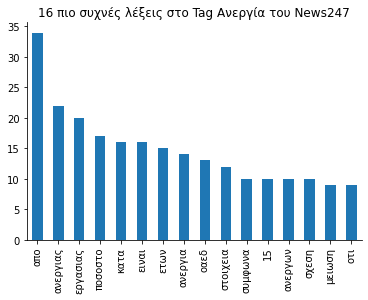

In [40]:
w = sum_words.sort_values(ascending = False).head(16).plot(kind='bar')
w.spines['right'].set_visible(False)
w.spines['top'].set_visible(False)
w.set_title('16 πιο συχνές λέξεις στο Tag Ανεργία του News247')

Text(0.5, 1.0, '16 πιο συχνές λέξεις στο Tag ανεργία του News247')

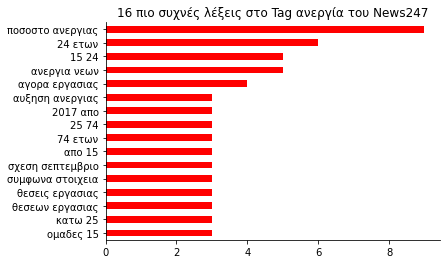

In [41]:
w2 = sum_words2.sort_values(ascending = True).tail(16).plot(kind='barh', color='red')
w2.spines['right'].set_visible(False)
w2.spines['top'].set_visible(False)
w2.set_title('16 πιο συχνές λέξεις στο Tag ανεργία του News247')

In [42]:
import glob
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [46]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [47]:
matrix = vec.fit_transform(news_anergia['Heading'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
emolex_df.head()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
emolex_df[emolex_df.Anger == 1].tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,13104,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,13106,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,13110,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,13138,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [50]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']
positive_words = emolex_df[emolex_df.Positive == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [51]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)
df['positivity'] = wordcount_df[positive_words].sum(axis=1)
df['joy'] = wordcount_df[joy_words].sum(axis=1)
df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
df['trust'] = wordcount_df[trust_words].sum(axis=1)
df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
df['negative'] = wordcount_df[negative_words].sum(axis=1)
df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [52]:
df.head(2)

,Unnamed: 0,Image,Tag,tag_url,Heading,Date,Time,Description,Url,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,0,https://www.news247.gr/img/3473/9648745/982000/w140/140/alpha_bank.jpg,Τράπεζες,https://www.news247.gr/trapezes,"""Συναλλαγή της χρονιάς"" το Project Galaxy στα Structured Credit Investor (SCI) NPL Securitisation Awards",2022-06-30,17:15,"Σύμφωνα με τους αναλυτές του SCI, η συναλλαγή Galaxy ήταν ένα ιστορικό ορόσημο για το ελληνικό τραπεζικό σύστημα εν γένει, καθώς το χαρτοφυλάκιό του αναλογούσε περίπου στο 20% των συνολικών καταγγελθέντων δανείων του τραπεζικού τομέα.",https://www.news247.gr/oikonomia/synallagi-tis-chronias-to-project-galaxy-sta-structured-credit-investor-sci-npl-securitisation-awards.9682398.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,https://www.news247.gr/img/2150/9645446/810000/w140/140/alpha-bank.jpg,Alpha Bank,https://www.news247.gr/alpha-bank,Alpha Bank: Εγκαινιάζει το Xiaomi Pay για ανέπαφες πληρωμές με κάρτες Mastercard,2022-06-30,16:58,"Οι κάτοχοι καρτών Alpha Bank Mastercard μπορούν να συνδέσουν τις κάρτες τους στις υποστηριζόμενες συσκευές, και να πληρώνουν σε όλα τα φυσικά καταστήματα που διαθέτουν τερματικό αποδοχής (POS) ανέπαφων συναλλαγών.",https://www.news247.gr/oikonomia/alpha-bank-egkainiazei-to-xiaomi-pay-gia-anepafes-pliromes-me-kartes-mastercard.9682405.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df['positivity'].sum() #Βαθμος θετικότητας στα συλλεγμένα άρθρα

16.0

In [54]:
df['negative'].sum() #Βαθμος αρνητικότητας στα συλλεγμένα άρθρα

24.0

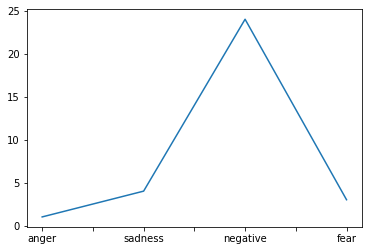

In [55]:
df[['anger','sadness','negative','fear']].sum().plot() #αρχικά για τα αρνητικά

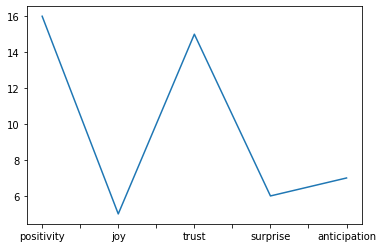

In [56]:
df[['positivity','joy','trust','surprise','anticipation']].sum().plot() #τα θετικά

Text(0.5, 0, 'Emotions')

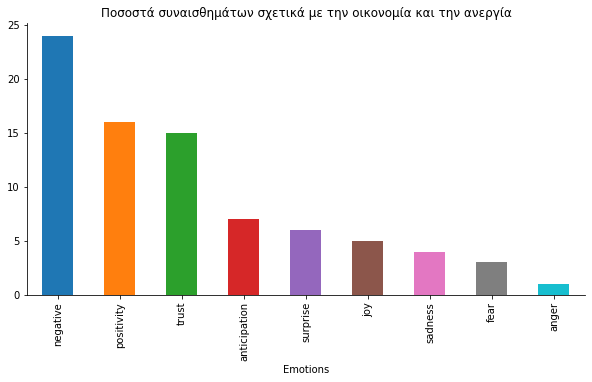

In [57]:
t = df[['anger','positivity','joy','surprise','trust','anticipation','sadness','negative','fear']].sum().sort_values(ascending= False).plot(kind='bar',color=('C0','C1','C2','C3','C4','C5','C6','C7','C9'), figsize=(10,5))
t.set_title('Ποσοστά συναισθημάτων σχετικά με την οικονομία και την ανεργία')
t.spines['right'].set_visible(False)
t.spines['top'].set_visible(False)
t.set_xlabel('Emotions')

In [58]:
df.dtypes

Unnamed: 0        int64
Image            object
Tag              object
tag_url          object
Heading          object
Date             object
Time             object
Description      object
Url              object
anger           float64
positivity      float64
joy             float64
disgust         float64
surprise        float64
trust           float64
anticipation    float64
sadness         float64
negative        float64
fear            float64
dtype: object

In [87]:
clean_body = []
for Heading in news_anergia['Heading']:
    Heading = re.sub("@[A-Za-z0-9]+","",Heading)
    Heading = re.sub(r'\d+', '', Heading)
    Heading = re.sub(r'\s+', ' ',Heading, flags=re.I)
    Heading = Heading.lower() 
    Heading = re.sub(r'\s+[a-zA-Z]\s+', ' ', Heading)
    Heading = re.sub(r'\W', ' ', Heading)    
     #Remove @ sign
    ##Here's where all the cleaning takes place
    clean_body.append(Heading)
news_anergia['clean_body'] = clean_body

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


(-0.5, 1999.5, 999.5, -0.5)

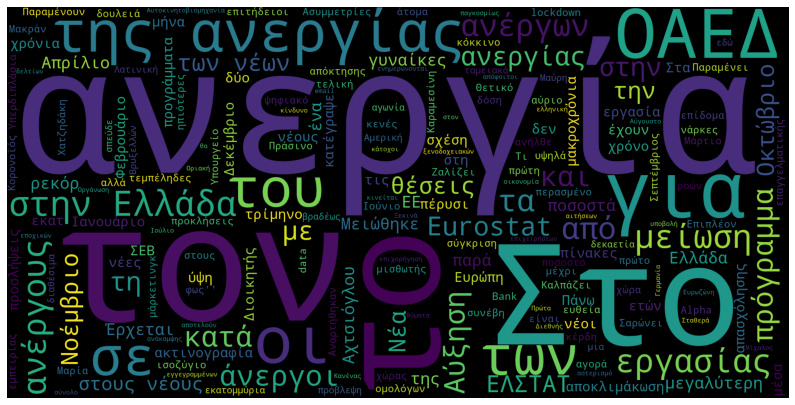

In [88]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(
    background_color="black", width=2000, height=1000).generate(
    ' '.join(news_anergia["Heading"]))

plt.figure(figsize=(14, 8))
plt.imshow(wc)
plt.axis("off")